# **First GOP Debate Twitter Sentiment**

In [1]:
#Import the Library
import numpy as np 
import pandas as pd 
import warnings
import matplotlib.pyplot as plt
import tensorflow as tf 
%matplotlib inline

warnings.simplefilter('ignore')

In [2]:
#Upload the kaggle API Key
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"danafatadillarabba","key":"83d806b564a918c17af31cb210c54538"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
#Download dataset with Kaggle API command
! kaggle datasets download -d crowdflower/first-gop-debate-twitter-sentiment

  0% 0.00/2.40M [00:00<?, ?B/s]
100% 2.40M/2.40M [00:00<00:00, 86.2MB/s]


In [5]:
!unzip -q "/content/first-gop-debate-twitter-sentiment.zip"

In [6]:
#Read the data
df = pd.read_csv('Sentiment.csv')
df

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0000,yes,1.0000,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0000,yes,1.0000,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0000,yes,1.0000,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13866,13867,No candidate mentioned,1.0000,yes,1.0000,Negative,0.7991,Abortion,0.6014,No candidate mentioned,...,yes,7,Negative,Abortion\nWomen's Issues (not abortion though),RT @cappy_yarbrough: Love to see men who will ...,NaN,2015-08-07 09:29:43 -0700,629690895479250944,Como,NaN
13867,13868,Mike Huckabee,0.9611,yes,1.0000,Positive,0.7302,None of the above,0.9229,Mike Huckabee,...,yes,1,NaN,NaN,RT @georgehenryw: Who thought Huckabee exceede...,NaN,2015-08-07 09:25:02 -0700,629689719056568320,USA,NaN
13868,13869,Ted Cruz,1.0000,yes,1.0000,Positive,0.8051,None of the above,0.9647,Ted Cruz,...,yes,67,Positive\nNeutral,NaN,"RT @Lrihendry: #TedCruz As President, I will a...",NaN,2015-08-07 07:19:18 -0700,629658075784282112,NaN,NaN
13869,13870,Donald Trump,1.0000,yes,1.0000,Negative,1.0000,Women's Issues (not abortion though),0.9202,Donald Trump,...,yes,149,NaN,Women's Issues (not abortion though),RT @JRehling: #GOPDebate Donald Trump says tha...,NaN,2015-08-07 09:54:04 -0700,629697023663546368,NaN,NaN


In [7]:
df.shape

(13871, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13871 non-null  int64  
 1   candidate                  13775 non-null  object 
 2   candidate_confidence       13871 non-null  float64
 3   relevant_yn                13871 non-null  object 
 4   relevant_yn_confidence     13871 non-null  float64
 5   sentiment                  13871 non-null  object 
 6   sentiment_confidence       13871 non-null  float64
 7   subject_matter             13545 non-null  object 
 8   subject_matter_confidence  13871 non-null  float64
 9   candidate_gold             28 non-null     object 
 10  name                       13871 non-null  object 
 11  relevant_yn_gold           32 non-null     object 
 12  retweet_count              13871 non-null  int64  
 13  sentiment_gold             15 non-null     obj

In [9]:
df['sentiment'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [10]:
df = df[['text', 'sentiment']]

# **NLP using Traditional Machine Learning**

## **Data Preprocessing**

In [ ]:
# Importing essential libraries for performing Natural Language Processing on the dataset
import nltk
import re
from collections import defaultdict
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import regexp_tokenize

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm, linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
df.drop_duplicates(keep = "first", inplace = True)
df.shape

(10567, 2)

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

text         0
sentiment    0
dtype: int64

In [ ]:
df.text = df.text.apply(lambda x: str(x).lower())

In [ ]:
df

,text,sentiment
0,rt @nancyleegrahn: how did everyone feel about...,Neutral
1,rt @scottwalker: didn't catch the full #gopdeb...,Positive
2,rt @tjmshow: no mention of tamir rice and the ...,Neutral
3,rt @robgeorge: that carly fiorina is trending ...,Positive
4,rt @danscavino: #gopdebate w/ @realdonaldtrump...,Positive
...,...,...
13846,me watching the gop debates. #gopdebates https...,Neutral
13847,rt @mjtbaum: god is making an appearance at th...,Positive
13857,"this is why i don't watch fox news, they're al...",Negative
13859,"best line of #gopdebate was ""immigration witho...",Positive


In [ ]:
def strip_html(raw_text):
  clean_text = re.sub(pattern='[^a-zA-Z]',repl=' ', string=raw_text)
  return clean_text

In [ ]:
df.text = df.text.apply(lambda x: strip_html(x))

In [ ]:
df

,text,sentiment
0,rt nancyleegrahn how did everyone feel about...,Neutral
1,rt scottwalker didn t catch the full gopdeb...,Positive
2,rt tjmshow no mention of tamir rice and the ...,Neutral
3,rt robgeorge that carly fiorina is trending ...,Positive
4,rt danscavino gopdebate w realdonaldtrump...,Positive
...,...,...
13846,me watching the gop debates gopdebates https...,Neutral
13847,rt mjtbaum god is making an appearance at th...,Positive
13857,this is why i don t watch fox news they re al...,Negative
13859,best line of gopdebate was immigration witho...,Positive


In [ ]:
# Running WhiteSpace tokenizer 
wpTokenizer = WordPunctTokenizer()
df["review_tokenized"] = [wpTokenizer.tokenize(text) for text in df["text"]]

In [ ]:
df

,text,sentiment,review_tokenized
0,rt nancyleegrahn how did everyone feel about...,Neutral,"[rt, nancyleegrahn, how, did, everyone, feel, ..."
1,rt scottwalker didn t catch the full gopdeb...,Positive,"[rt, scottwalker, didn, t, catch, the, full, g..."
2,rt tjmshow no mention of tamir rice and the ...,Neutral,"[rt, tjmshow, no, mention, of, tamir, rice, an..."
3,rt robgeorge that carly fiorina is trending ...,Positive,"[rt, robgeorge, that, carly, fiorina, is, tren..."
4,rt danscavino gopdebate w realdonaldtrump...,Positive,"[rt, danscavino, gopdebate, w, realdonaldtrump..."
...,...,...,...
13846,me watching the gop debates gopdebates https...,Neutral,"[me, watching, the, gop, debates, gopdebates, ..."
13847,rt mjtbaum god is making an appearance at th...,Positive,"[rt, mjtbaum, god, is, making, an, appearance,..."
13857,this is why i don t watch fox news they re al...,Negative,"[this, is, why, i, don, t, watch, fox, news, t..."
13859,best line of gopdebate was immigration witho...,Positive,"[best, line, of, gopdebate, was, immigration, ..."


In [ ]:
# Stopwords removal & WordNet lemmatization 

# Define POS tags 
tag_map = defaultdict(lambda : wordnet.NOUN)
tag_map['J'] = wordnet.ADJ
tag_map['V'] = wordnet.VERB
tag_map['R'] = wordnet.ADV

In [ ]:
for index, text in enumerate(df.review_tokenized):
    if index % 1000 == 0:
        print(index)
#     print("-" * 50)
    word_list = []
    wordnet_lemmatizer = WordNetLemmatizer()
    for word, tag in pos_tag(text):
        if word not in stopwords.words("english") and word.isalpha():
            word_processed = wordnet_lemmatizer.lemmatize(word, tag_map[tag[0]])
            word_list.append(word_processed)
    df.loc[index, "review_tokenized_cleaned"] = str(word_list)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [ ]:
df

,text,sentiment,review_tokenized,review_tokenized_cleaned
0,rt nancyleegrahn how did everyone feel about...,Neutral,"[rt, nancyleegrahn, how, did, everyone, feel, ...","['rt', 'nancyleegrahn', 'everyone', 'feel', 'c..."
1,rt scottwalker didn t catch the full gopdeb...,Positive,"[rt, scottwalker, didn, t, catch, the, full, g...","['rt', 'scottwalker', 'catch', 'full', 'gopdeb..."
2,rt tjmshow no mention of tamir rice and the ...,Neutral,"[rt, tjmshow, no, mention, of, tamir, rice, an...","['rt', 'tjmshow', 'mention', 'tamir', 'rice', ..."
3,rt robgeorge that carly fiorina is trending ...,Positive,"[rt, robgeorge, that, carly, fiorina, is, tren...","['rt', 'robgeorge', 'carly', 'fiorina', 'trend..."
4,rt danscavino gopdebate w realdonaldtrump...,Positive,"[rt, danscavino, gopdebate, w, realdonaldtrump...","['rt', 'danscavino', 'gopdebate', 'w', 'realdo..."
...,...,...,...,...
10559,NaN,NaN,NaN,"['jessicavalenti', 'need', 'coif', 'reform', '..."
10561,NaN,NaN,NaN,"['rt', 'let', 'play', 'fast', 'distance', 'tru..."
10562,NaN,NaN,NaN,"['watch', 'gop', 'debate', 'gopdebates', 'http..."
10564,NaN,NaN,NaN,"['watch', 'fox', 'news', 'asshole', 'gopdebates']"


In [ ]:
df.review_tokenized_cleaned.isna().sum()

1449

In [ ]:
df = df.dropna()

In [ ]:
df

,text,sentiment,review_tokenized,review_tokenized_cleaned
0,rt nancyleegrahn how did everyone feel about...,Neutral,"[rt, nancyleegrahn, how, did, everyone, feel, ...","['rt', 'nancyleegrahn', 'everyone', 'feel', 'c..."
1,rt scottwalker didn t catch the full gopdeb...,Positive,"[rt, scottwalker, didn, t, catch, the, full, g...","['rt', 'scottwalker', 'catch', 'full', 'gopdeb..."
2,rt tjmshow no mention of tamir rice and the ...,Neutral,"[rt, tjmshow, no, mention, of, tamir, rice, an...","['rt', 'tjmshow', 'mention', 'tamir', 'rice', ..."
3,rt robgeorge that carly fiorina is trending ...,Positive,"[rt, robgeorge, that, carly, fiorina, is, tren...","['rt', 'robgeorge', 'carly', 'fiorina', 'trend..."
4,rt danscavino gopdebate w realdonaldtrump...,Positive,"[rt, danscavino, gopdebate, w, realdonaldtrump...","['rt', 'danscavino', 'gopdebate', 'w', 'realdo..."
...,...,...,...,...
10552,well god got more time than black lives t...,Negative,"[well, god, got, more, time, than, black, live...","['bonniesamerica', 'foxnews', 'realdonaldtrump..."
10555,sportspickle when i saw this all i thought o...,Negative,"[sportspickle, when, i, saw, this, all, i, tho...","['yes', 'moe', 'smart', 'stooge', 'democrat', ..."
10560,dumbgaybatman all of the gopdebates candida...,Negative,"[dumbgaybatman, all, of, the, gopdebates, cand...","['wow', 'rubio', 'ear', 'head', 'ratio', 'mess..."
10563,i hope trump says i don t talk to myself g...,Negative,"[i, hope, trump, says, i, don, t, talk, to, my...","['rt', 'mjtbaum', 'god', 'make', 'appearance',..."


In [ ]:
train_X, test_X, train_y, test_y = model_selection.train_test_split(df['review_tokenized_cleaned'], df['sentiment'], test_size = 0.2, random_state =1)

In [ ]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(7294,)
(1824,)
(7294,)
(1824,)


In [ ]:
test_y.value_counts()

Negative    1031
Neutral      514
Positive     279
Name: sentiment, dtype: int64

In [ ]:
train_y.value_counts()

Negative    4182
Neutral     1883
Positive    1229
Name: sentiment, dtype: int64

In [ ]:
label_enc = LabelEncoder()
train_y = label_enc.fit_transform(train_y)
test_y = label_enc.transform(test_y)

In [ ]:
print(np.unique(test_y, return_counts = True))
print(np.unique(train_y, return_counts = True))

(array([0, 1, 2]), array([1031,  514,  279]))
(array([0, 1, 2]), array([4182, 1883, 1229]))


In [ ]:
tfidf_vect = TfidfVectorizer(max_features = 10000)
tfidf_vect.fit(df.review_tokenized_cleaned)

TfidfVectorizer(max_features=10000)

In [ ]:
train_X_tfidf = tfidf_vect.transform(train_X)
test_X_tfidf = tfidf_vect.transform(test_X)

In [ ]:
train_X_tfidf.shape

(7294, 10000)

## **ML Model Building**

In [ ]:
svm = svm.SVC(C = 1.0, kernel = "linear", degree = 3, gamma = "auto")
svm.fit(train_X_tfidf, train_y)

SVC(gamma='auto', kernel='linear')

In [ ]:
preds_svm = svm.predict(test_X_tfidf)
print(preds_svm.shape)

(1824,)


In [ ]:
accuracy_score(preds_svm, test_y)

0.625

In [ ]:
print(classification_report(test_y, preds_svm))

              precision    recall  f1-score   support

           0       0.65      0.89      0.75      1031
           1       0.55      0.31      0.39       514
           2       0.55      0.25      0.34       279

    accuracy                           0.62      1824
   macro avg       0.58      0.48      0.49      1824
weighted avg       0.61      0.62      0.59      1824



In [ ]:
log_reg = linear_model.LogisticRegression(solver = "lbfgs")
log_reg.fit(train_X_tfidf, train_y)

LogisticRegression()

In [ ]:
preds_log_reg = log_reg.predict(test_X_tfidf)
preds_log_reg.shape

(1824,)

In [ ]:
accuracy_score(preds_log_reg, test_y)

0.6222587719298246

In [ ]:
print(classification_report(test_y, preds_log_reg))

              precision    recall  f1-score   support

           0       0.64      0.90      0.75      1031
           1       0.56      0.30      0.39       514
           2       0.53      0.20      0.29       279

    accuracy                           0.62      1824
   macro avg       0.58      0.47      0.48      1824
weighted avg       0.60      0.62      0.58      1824



In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(train_X_tfidf, train_y)

XGBClassifier(objective='multi:softprob')

In [ ]:
preds_xgb= xgb.predict(test_X_tfidf)
print(classification_report(test_y, preds_xgb))

              precision    recall  f1-score   support

           0       0.59      0.95      0.73      1031
           1       0.56      0.12      0.20       514
           2       0.57      0.10      0.17       279

    accuracy                           0.59      1824
   macro avg       0.57      0.39      0.37      1824
weighted avg       0.58      0.59      0.49      1824



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_X_tfidf, train_y)

RandomForestClassifier()

In [ ]:
preds_rfc= rfc.predict(test_X_tfidf)
print(classification_report(test_y, preds_rfc))

              precision    recall  f1-score   support

           0       0.61      0.93      0.74      1031
           1       0.59      0.21      0.31       514
           2       0.54      0.17      0.26       279

    accuracy                           0.61      1824
   macro avg       0.58      0.43      0.43      1824
weighted avg       0.60      0.61      0.54      1824



## **Deep Learning Model Building**

In [ ]:
train_cat_y = tf.keras.utils.to_categorical(train_y)
test_cat_y = tf.keras.utils.to_categorical(test_y)

In [ ]:
train_cat_y

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
dl = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_dim=10000, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])



In [ ]:
dl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320032    
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 9

In [ ]:
dl.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy', tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.Precision(name='precision')])

In [ ]:
dl_history = dl.fit(train_X_tfidf, train_cat_y, epochs=12,
                    validation_data=(test_X_tfidf, test_cat_y), validation_steps=30)

Epoch 1/12
228/228 [==============================] - 4s 9ms/step - loss: 1.0509 - accuracy: 0.5664 - recall: 0.0014 - precision: 0.5000 - val_loss: 0.9895 - val_accuracy: 0.5652 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/12
228/228 [==============================] - 2s 7ms/step - loss: 0.9659 - accuracy: 0.5733 - recall: 0.4250 - precision: 0.5907 - val_loss: 0.9564 - val_accuracy: 0.5652 - val_recall: 0.5652 - val_precision: 0.5652
Epoch 3/12
228/228 [==============================] - 2s 6ms/step - loss: 0.9370 - accuracy: 0.5733 - recall: 0.5557 - precision: 0.5962 - val_loss: 0.9422 - val_accuracy: 0.5652 - val_recall: 0.5598 - val_precision: 0.5814
Epoch 4/12
228/228 [==============================] - 1s 6ms/step - loss: 0.8932 - accuracy: 0.5733 - recall: 0.5426 - precision: 0.6641 - val_loss: 0.9182 - val_accuracy: 0.5652 - val_recall: 0.4951 - val_precision: 0.6409
Epoch 5/12
228/228 [==============================] - 1s 6ms/step - loss: 0.8262 - accuracy: 0.5

In [ ]:
test_loss, test_acc, test_recall, test_precision = dl.evaluate(test_X_tfidf, test_cat_y)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
print('Test Recall:', test_recall)
print('Test Precision:', test_precision)

57/57 [==============================] - 0s 2ms/step - loss: 1.0892 - accuracy: 0.6075 - recall: 0.5208 - precision: 0.6467
Test Loss: 1.0891609191894531
Test Accuracy: 0.6074561476707458
Test Recall: 0.5208333134651184
Test Precision: 0.6466984152793884


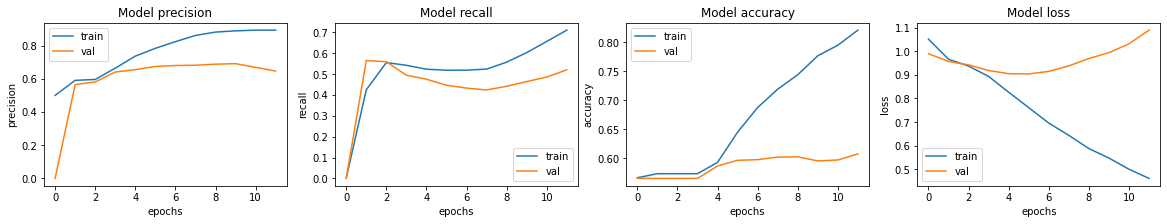

In [ ]:
# Interpreting the Metrics 
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(dl_history.history[met])
    ax[i].plot(dl_history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

# **Deep Learning using LSTM**

In [11]:
df

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive
...,...,...
13866,RT @cappy_yarbrough: Love to see men who will ...,Negative
13867,RT @georgehenryw: Who thought Huckabee exceede...,Positive
13868,"RT @Lrihendry: #TedCruz As President, I will a...",Positive
13869,RT @JRehling: #GOPDebate Donald Trump says tha...,Negative


In [12]:
data = df[['sentiment', 'text']]
data.head()

,sentiment,text
0,Neutral,RT @NancyLeeGrahn: How did everyone feel about...
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,Neutral,RT @TJMShow: No mention of Tamir Rice and the ...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


In [13]:
data.isnull().sum()

sentiment    0
text         0
dtype: int64

In [14]:
data=data.dropna()

In [15]:
from sklearn.preprocessing import LabelEncoder 

Le = LabelEncoder()
data_labels = Le.fit_transform(data['sentiment'])
data_labels = tf.keras.utils.to_categorical(data_labels)

In [16]:
data_labels

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [17]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(data['text'], data_labels, test_size=0.3, random_state=1)

In [18]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(2048)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.shuffle(512)

In [19]:
for example, label in train_ds.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  b"TruthTeamOne: The big winner of the #GOPDebate wasn't Scott Walker, it was Johnny Walker. http://t.co/LOdMCzBPe2 http://t.co/AuhlNZa3Ww"
label:  [1. 0. 0.]


In [20]:
BUFFER_SIZE = 10000
BATCH_SIZE = 32

In [21]:
train_dataset = train_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [22]:
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b'@realDonaldTrump "took advantage of chapter laws" the same way welfare fraud is committed. It\'s all just gaming the system. #GOPDebate #2016'
 b"RT @SupermanHotMale: Total Theatre on Fox news tonight, no basis in fact at all... it's all garbage. #GopDebates"
 b'Oh Trump! You slay me! #DebateWithBernie #Democrat #GOPDebate http://t.co/yhfktWap9z']

labels:  [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
VOCAB_SIZE = 10000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'gopdebate', 'the', 't', 'rt', 'co', 'to', 'http',
       'a', 'i', 'of', 's', 'is', 'and', 'in', 'trump', 'for', 'on',
       'you'], dtype='<U47')

In [ ]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[   5,  328,   59,   79,   13, 1203,  266,    7, 2421,    3, 3064,
          11,    3,   98,  415,    2,   20,    0,    0,    0,    0,    0,
           0,    0,    0],
       [   5,    1,   54,  217,  271,    3,   34,   21,   12,   27,   10,
        1025,    2,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [   5,    1,    1,  719,    7,  165, 1172,   64,   38,   56, 4930,
          29,   13,    3,  337, 1777,  242, 1502,  239,   38,    9,  200,
           2,    0,    0]])

In [ ]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b'rt  rwsurfergirl  fox news is obviously trying to influence the makeup of the republican field       gopdebate   gopdebates'
Round-trip:  rt rwsurfergirl fox news is obviously trying to influence the makeup of the republican field gopdebate gopdebates        

Original:  b'rt  eliseschloff  can someone tell the gop it s not  i ran       gopdebate'
Round-trip:  rt [UNK] can someone tell the gop it s not i ran gopdebate            

Original:  b'rt  chi kimura  according to huckabee trans people are just experiments  this is the   st century where lgbt rights are a thing   gopdebate '
Round-trip:  rt [UNK] [UNK] according to huckabee trans people are just experiments this is the st century where lgbt rights are a thing gopdebate  



In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='sigmoid')
])



In [ ]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True, True, True, True, True, True]


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 64)          640000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy', tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.Precision(name='precision')])

In [ ]:
history = model.fit(train_dataset, epochs=12,
                    validation_data=test_dataset, validation_steps=30)

Epoch 1/12
200/200 [==============================] - 26s 75ms/step - loss: 1.0356 - accuracy: 0.5528 - recall: 0.5668 - precision: 0.5432 - val_loss: 0.9775 - val_accuracy: 0.5469 - val_recall: 0.5469 - val_precision: 0.5469
Epoch 2/12
200/200 [==============================] - 11s 57ms/step - loss: 0.9483 - accuracy: 0.5747 - recall: 0.5870 - precision: 0.5592 - val_loss: 0.9347 - val_accuracy: 0.5552 - val_recall: 0.5552 - val_precision: 0.5552
Epoch 3/12
200/200 [==============================] - 13s 64ms/step - loss: 0.8549 - accuracy: 0.5790 - recall: 0.6014 - precision: 0.5699 - val_loss: 0.8839 - val_accuracy: 0.6135 - val_recall: 0.6354 - val_precision: 0.5963
Epoch 4/12
200/200 [==============================] - 13s 64ms/step - loss: 0.7477 - accuracy: 0.6573 - recall: 0.7198 - precision: 0.6237 - val_loss: 0.9142 - val_accuracy: 0.6250 - val_recall: 0.6750 - val_precision: 0.5745
Epoch 5/12
200/200 [==============================] - 12s 58ms/step - loss: 0.6349 - accuracy: 0

In [ ]:
test_loss, test_acc, test_recall, test_precision = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
print('Test Recall:', test_recall)
print('Test Precision:', test_precision)

86/86 [==============================] - 1s 16ms/step - loss: 1.9385 - accuracy: 0.5621 - recall: 0.6608 - precision: 0.5228
Test Loss: 1.938492774963379
Test Accuracy: 0.5621345043182373
Test Recall: 0.6608186960220337
Test Precision: 0.5228455662727356


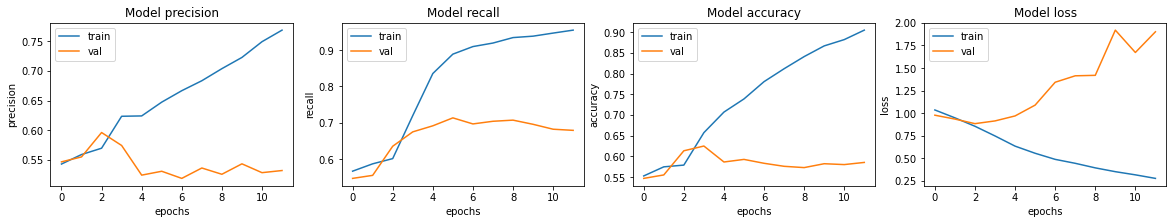

In [ ]:
# Interpreting the Metrics 
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
sample_text = ('He is a good person. But, I dont think he is the best')
predictions = model.predict(np.array([sample_text]))
print(Le.inverse_transform([np.argmax(predictions)]))

['Positive']


# **Deep Learning using BERT Model**

In [23]:
# A dependency of the preprocessing for BERT inputs
! pip install -q tensorflow-text==2.8.2
! pip install -q tf-models-official==2.7.0

     |████████████████████████████████| 4.9 MB 32.3 MB/s 
     |████████████████████████████████| 1.8 MB 20.6 MB/s 
     |████████████████████████████████| 596 kB 59.1 MB/s 
     |████████████████████████████████| 99 kB 8.0 MB/s 
     |████████████████████████████████| 116 kB 69.2 MB/s 
     |████████████████████████████████| 352 kB 64.3 MB/s 
     |████████████████████████████████| 238 kB 55.9 MB/s 
     |████████████████████████████████| 43 kB 1.1 MB/s 
     |████████████████████████████████| 1.1 MB 47.0 MB/s 
     |████████████████████████████████| 1.3 MB 6.7 MB/s 


In [24]:
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

tf.get_logger().setLevel('ERROR')

In [25]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'small_bert/bert_en_uncased_L-10_H-256_A-4'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [26]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [27]:
text_test = ['this is such an amazing movie!']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_mask', 'input_type_ids', 'input_word_ids']
Shape      : (1, 128)
Word Ids   : [ 101 2023 2003 2107 2019 6429 3185  999  102    0    0    0]
Input Mask : [1 1 1 1 1 1 1 1 1 0 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [28]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [29]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1
Pooled Outputs Shape:(1, 256)
Pooled Outputs Values:[-0.78797096 -0.9383286  -0.95473486  0.12199647 -0.9865036  -0.19943489
  0.9937595  -0.6590784  -0.5271124  -0.20153345 -0.02217445 -0.10342663]
Sequence Outputs Shape:(1, 128, 256)
Sequence Outputs Values:[[-0.3510177  -1.5343682  -1.4084653  ... -0.09103633  1.2868215
  -1.2302022 ]
 [-0.79543334 -0.62545884 -0.83403856 ...  0.26116174  0.03758706
  -1.3754464 ]
 [-0.68285155 -1.3764199  -0.0877039  ... -0.12340638 -1.182638
  -0.781376  ]
 ...
 [-0.5738992  -1.1032782  -0.02026882 ... -0.10513157  1.0499818
  -1.3271623 ]
 [-1.2010963  -1.1889215  -0.09465007 ... -0.51993865  0.7323519
  -1.046635  ]
 [-1.2833424  -0.4745717  -1.3244352  ... -0.2879184   0.18060976
   0.14427406]]


In [30]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(3, activation='softmax', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [31]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.66586965 0.53827256 0.53918123]], shape=(1, 3), dtype=float32)


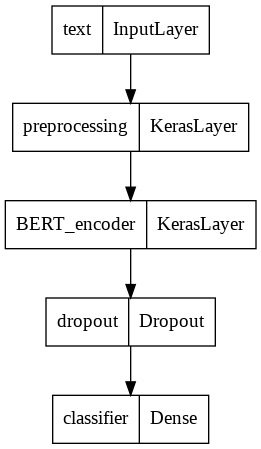

In [32]:
tf.keras.utils.plot_model(classifier_model)

In [33]:
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metrics=['accuracy', tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.Precision(name='precision')]

In [34]:
epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(train_dataset).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.4*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [35]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [36]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(train_dataset,
                               validation_data=test_dataset,
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1
Epoch 1/5
304/304 [==============================] - 94s 262ms/step - loss: 0.9324 - accuracy: 0.6032 - recall: 0.5304 - precision: 0.6329 - val_loss: 0.8202 - val_accuracy: 0.6413 - val_recall: 0.5543 - val_precision: 0.6911
Epoch 2/5
304/304 [==============================] - 77s 253ms/step - loss: 0.7927 - accuracy: 0.6587 - recall: 0.5813 - precision: 0.7022 - val_loss: 0.7363 - val_accuracy: 0.6754 - val_recall: 0.6021 - val_precision: 0.7351
Epoch 3/5
304/304 [==============================] - 77s 254ms/step - loss: 0.6964 - accuracy: 0.7049 - recall: 0.6516 - precision: 0.7402 - val_loss: 0.7088 - val_accuracy: 0.7052 - val_recall: 0.6569 - val_precision: 0.7302
Epoch 4/5
304/304 [==============================] - 77s 254ms/step - loss: 0.6437 - accuracy: 0.7292 - recall: 0.6826 - precision: 0.7656 - val_loss: 0.7065 - val_accuracy: 0.7025 - val_recall: 0.6636 - val_precision: 0.7288
Epo

In [37]:
test_loss, test_acc, test_recall, test_precision = classifier_model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
print('Test Recall:', test_recall)
print('Test Precision:', test_precision)

131/131 [==============================] - 14s 108ms/step - loss: 0.7082 - accuracy: 0.7025 - recall: 0.6586 - precision: 0.7261
Test Loss: 0.7082438468933105
Test Accuracy: 0.7025468349456787
Test Recall: 0.6585776209831238
Test Precision: 0.7260926961898804


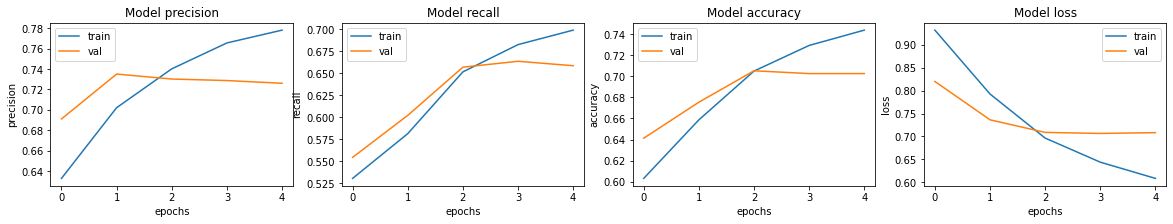

In [38]:
# Interpreting the Metrics 
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [39]:
sample_text = ('He is a good person. But, I dont think he is the best')
predictions = classifier_model.predict(np.array([sample_text]))
print(Le.inverse_transform([np.argmax(predictions)]))

['Positive']
